# **IMDB Recommendation System: Enhanced Model Report - Charles Blanch CSCI349** 

## **Introduction**

The primary goal of this project is to build a predictive model that personalizes movie recommendations for users based on their past movie ratings. Using publicly available, non-commercial IMDb datasets, this recommendation system aims to assist movie enthusiasts in discovering movies tailored to their preferences.

### **Objectives**
1. Develop and evaluate multiple regression models to predict personalized ratings.
2. Implement advanced modeling techniques such as Neural Networks, Support Vector Regression (SVR), and XGBoost, alongside existing models like Lasso and Random Forest.
3. Provide comparative performance analysis to identify the most effective approach.
4. Create a scalable and adaptable framework for users to generate personalized recommendations using their own data.

### **Project Updates**
In this enhanced iteration of the project, the following improvements have been made:
- **New Models**: Introduced advanced techniques such as Neural Networks, Support Vector Regression (SVR), and XGBoost to enhance prediction accuracy and model interpretability.
- **Expanded Dataset**: Incorporated additional data features and refined preprocessing steps for more comprehensive and representative insights.
- **Improved Visualizations**: Created new exploratory and result-driven visualizations to better understand user preferences and model performance.
- **Advanced Evaluation**: Applied hyperparameter tuning and additional evaluation metrics for more detailed performance analysis.
- **Refined Methodology**: Enhanced feature engineering and preprocessing techniques, including updated dummy variables and feature scaling strategies, to ensure robust model inputs.

This report will provide an overview of the updated methodology, data preparation, modeling approaches, evaluation metrics, and insights derived from the enhanced system. It aims to demonstrate the system's adaptability and scalability while emphasizing its potential for real-world application.


## **Data Preparation and Preprocessing** 

The success of any recommendation system depends heavily on the quality and structure of its input data. For this project, significant effort was dedicated to preparing the dataset to ensure that the models could effectively learn and generalize user preferences.

### **Dataset Overview** 
- **imdb_df**: Contains a comprehensive list of 4,274 movies with relevant details such as title, runtime, genres, IMDb rating, director, and cast members.
- **reviewed_df**: A personalized subset containing 176 movies that were rated by the user. This serves as the foundation for training and evaluating the recommendation models.

### **Data Cleaning and Integration** 
To create a unified dataset, multiple IMDb public datasets were merged. The datasets used are available in the IMDB MODEL Data Folder.
Key preprocessing steps included:
- **Handling Missing Data**: 
  - Movies with multiple directors were assigned "Multiple Directors" in the `Director` column.
  - Genre columns were expanded into three separate columns to account for movies with multiple genres
  - Lead Actors were split into multiple columns similar to genres 
- **Creation of Informational Columns**:
  - **`Age`**: Difference between the current year (2024) and the movie’s release year.
  - **`FamousDirector`**: Boolean column indicating whether the director has more than four movies in the dataset.
  - **`LongMovie`**: Boolean column identifying movies with a runtime exceeding two hours.

### **Feature Engineering**
To enhance the predictive power of the dataset:
1. **Dummy Variables**:
   - Created dummy columns for top genres, directors, and actors identified during exploratory data analysis.
   - Selected genres, directors, and actors based on significant differences in average user ratings or prominence in the dataset.
   - **After Running Multiple Models and examining major features, I converted the Age column into three dummy columns "is_New", "is_Old", and "is_Classic" in order to lower the effect of this single variable on the results. In the training dataframe there appears to be a strong correlation between Age and My Rating - Visual is provided in EDA Section**

2. **Custom Features**:
   - Included binary columns like `SuperFamousMovie`, which indicates high-profile films based on multiple factors.

### **Updated Dataset for Enhanced Models**
In this iteration of the project, the dataset has been updated with:
- New features related to award wins, user preferences, and language of the film.
- Refined dummy variables based on additional exploratory analysis.
- Optimized handling of missing values to reduce noise and improve model robustness.

### **Data Splitting Strategy**
Unlike conventional training/validation splits, this project leverages the full **reviewed_df** dataset for training due to its small size and inherent user bias. Predictions are then made on the larger **imdb_df**, which includes movies that have not been rated by the user.

This tailored data preparation approach ensures that the recommendation system can capture user preferences while maintaining generalizability for unseen movies.


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) plays a crucial role in understanding the patterns and relationships within the dataset. For this project, several visualizations and statistical analyses were conducted to uncover key insights that informed the feature engineering and modeling processes.

### **Key Insights from EDA**
1. **Genre Analysis**:
   - Average user ratings were calculated for each genre to determine trends and correlations with the target variable, `My Rating`.
   - Some movies had averages of 10/10 for rating which will eventually be an issue in model creation as only one movie was rated for that film and it happened to be rated a 10 - The model will think all movies of that genre will score highly
   - To create the final data frame, genres that had significant distance from the average of IMDb Ratings for that genre were added as dummy columns into the larger data frame

   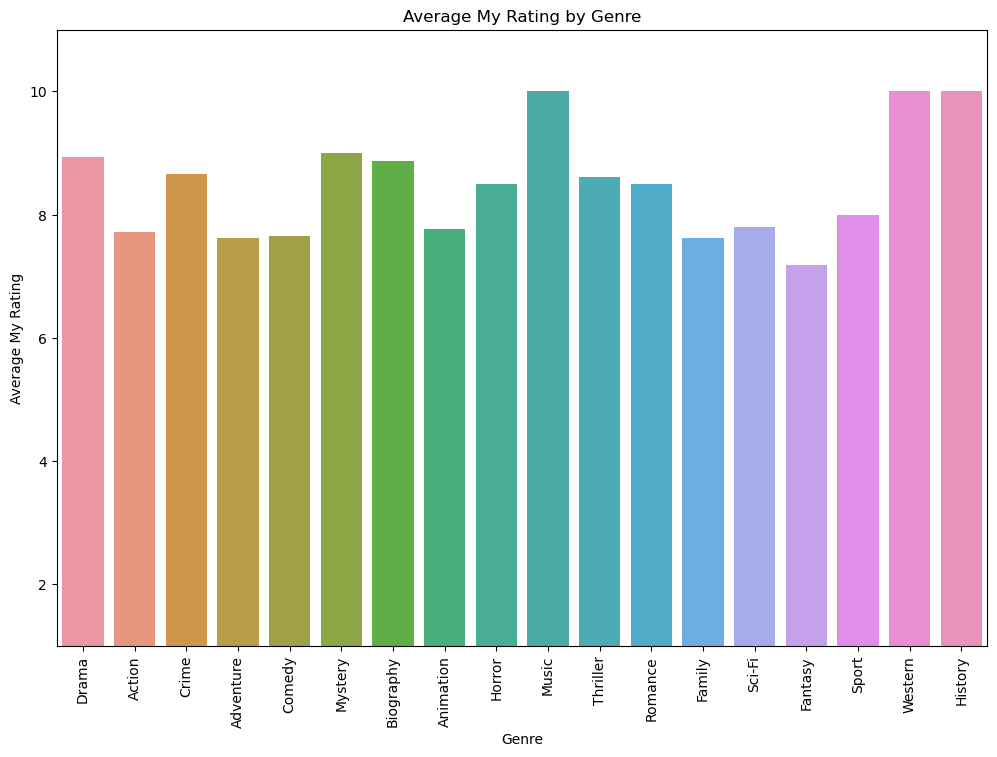

2. **Actor Importance**:
   - Weighted Average Rating by Lead Actor was calculated for users
   - Dummy Variables were creating for the top 7 lead actors by weighted average such as Robert Downey Jr, and the bottom 3 actors such as Sydney Sweeney
   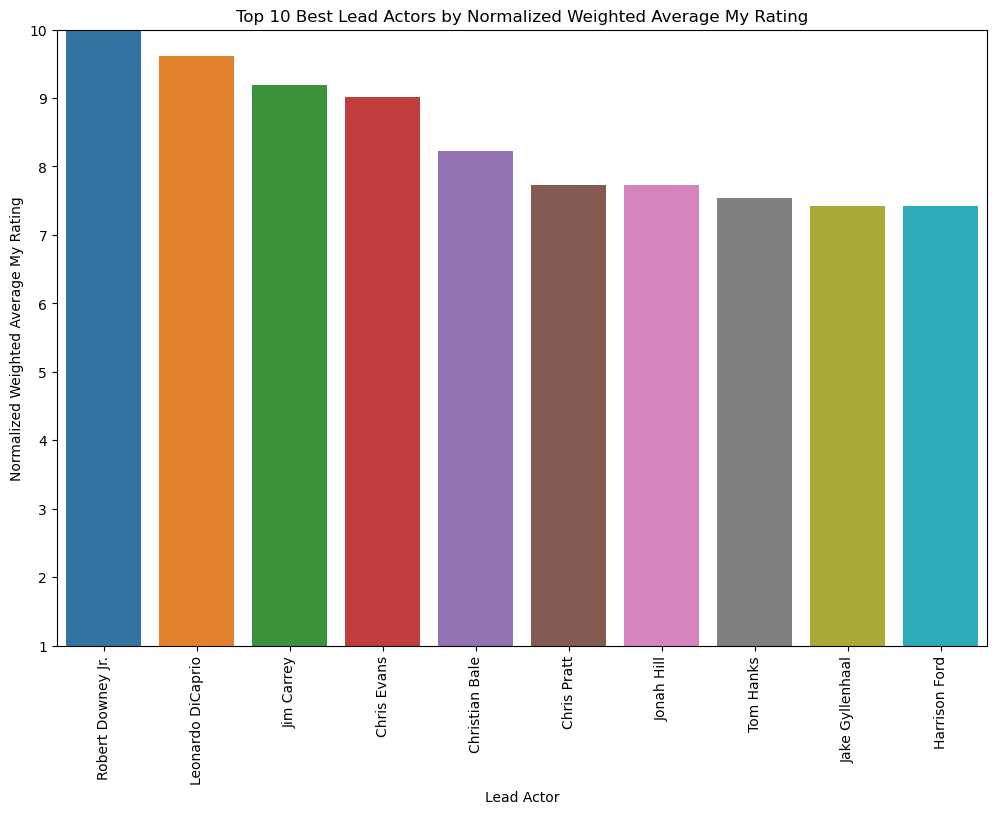
   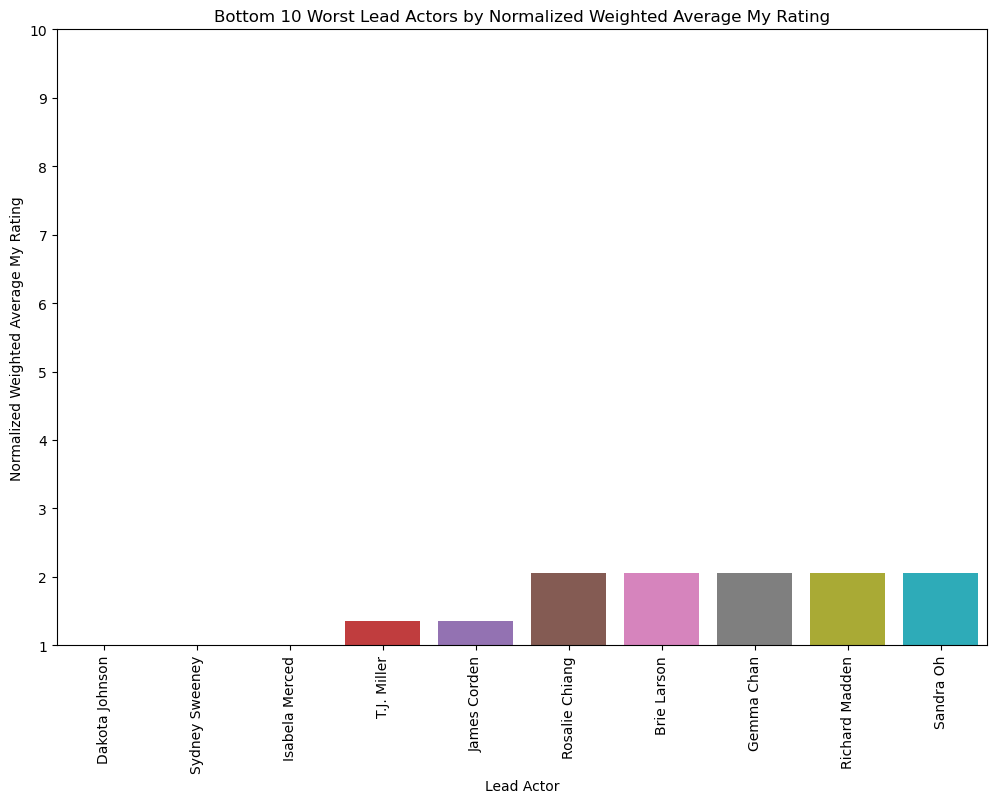
   
3. **Director Importance**:
   - To try to find if a director impacted the rating of a movie, we added dummy variables for some of the top directors by number of movies reviewed
   - Below is a visualization of the top directors

   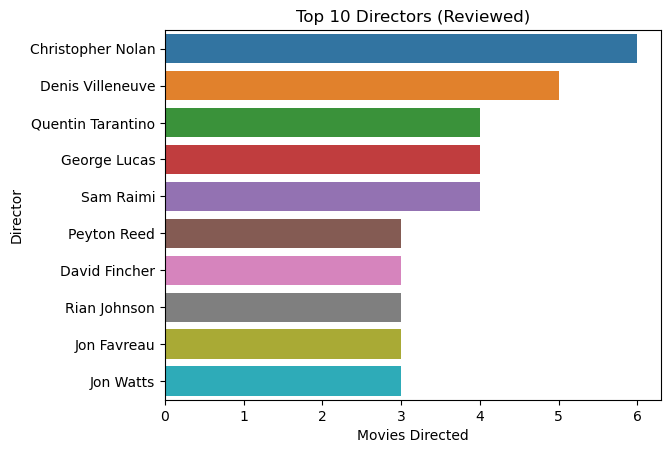

4. **Age Correlation with Ratings**:
   - A scatterplot revealed a positive relationship between the age of a movie and its user rating.
   - Based on this, the `Age` column was transformed into three categories: `is_New`, `is_Old`, and `is_Classic`, which were then encoded as dummy variables.

   **Visualization:**
   - The plots below demonstrates the correlation between movie age and user ratings:
   
   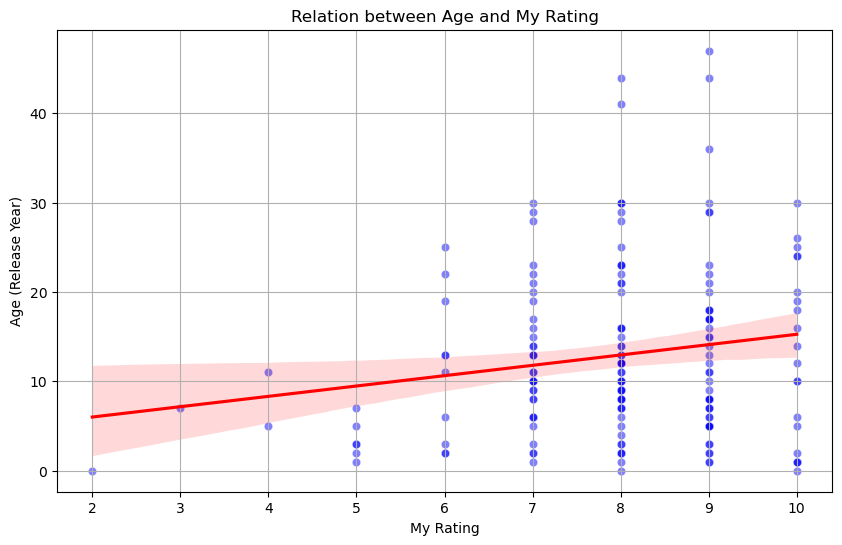
   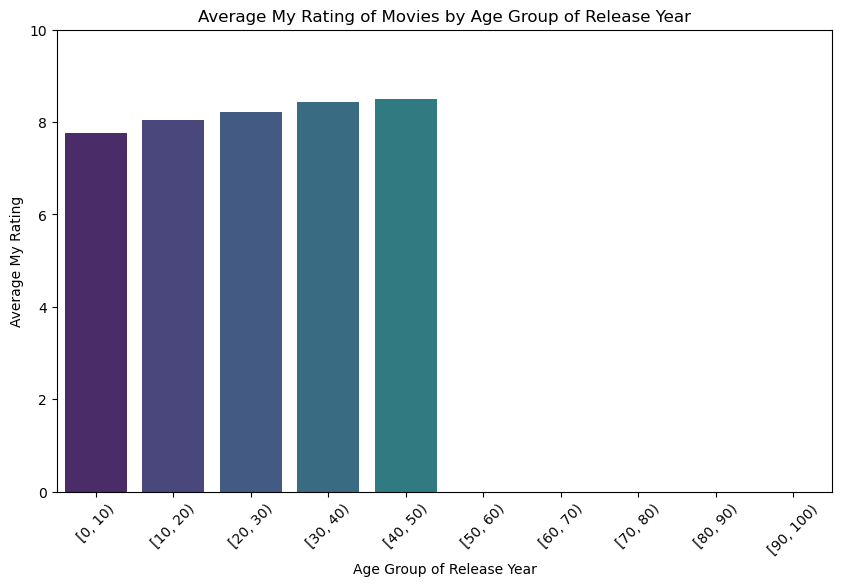

5. **Runtime Distribution**:
   - There seems to be a slight positive correlation between Runtime and user rating
   - The binary feature `LongMovie` was created to capture this trend.

   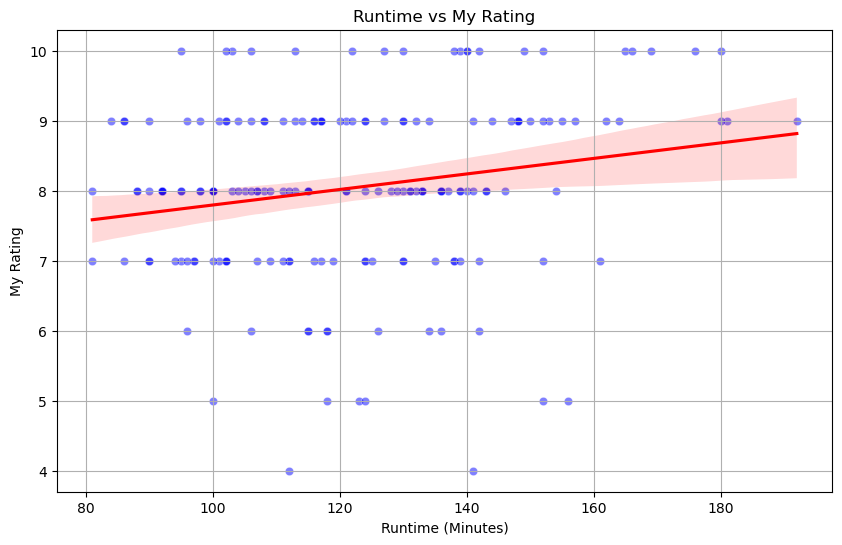

6. **Missing Data Analysis**:
   - Missing values in columns like `Director` and `Genres` were handled by creating aggregate categories (e.g., "Multiple Directors") or expanding genres into multiple columns.

### **Conclusions from EDA**
The EDA provided valuable insights into user preferences and feature correlations, informing the creation of new features such as dummy variables for age categories, top directors, and actors. The findings from our EDA is directly seen in the data frame preparation for the final Model Building


## **Modeling**

The heart of this project lies in the development and evaluation of various regression models to predict personalized user ratings for movies. In this enhanced iteration, three new models were introduced: Neural Network, Support Vector Regression (SVR), and XGBoost. Each model was built, tuned, and evaluated to ensure optimal performance and adaptability.

### **Models Implemented**
1. **Lasso Regression**:
   - **Overview**: Lasso regression applies L1 regularization to shrink less relevant features' coefficients to zero, effectively selecting important features.
   - **Hyperparameter Tuning**: The optimal alpha value was determined using cross-validation.
   - **Key Features Selected**:
     - `IMDb Rating`, `iswestern`, and `iscrime` were among the top contributors to the model’s predictions.

2. **Random Forest Regressor**:
   - **Overview**: An ensemble learning method that builds multiple decision trees and averages their predictions to enhance accuracy and robustness.
   - **Hyperparameter Tuning**: Conducted RandomizedSearchCV to identify the best parameters, such as:
     - `max_depth`: 10
     - `n_estimators`: 75
     - `min_samples_split`: 15
     - `min_impurity_decrease`: 0.01
     - `min_samples_leaf`: 3
   - **Feature Importance**:
     - Significant features included `IMDb Rating`, `Runtime`, `isdrama`, and `FamousDirector`.

3. **Neural Network**:
   - **Overview**: A feed-forward neural network was built using the Keras API to model complex relationships between features and the target variable (`My Rating`). The architecture included regularization and dropout layers to prevent overfitting.

- **Architecture**:
  - **Input Layer**: 39 input features.
  - **Hidden Layers**: 
    - 24 neurons with ReLU activation and L2 regularization.
    - Dropout layer (rate: 0.2).
    - 12 neurons with ReLU activation and L2 regularization.
  - **Output Layer**: 1 neuron with linear activation for regression.

- **Optimization and Tuning**:
  - Optimizer: RMSprop.
  - Loss Function: Mean Squared Error (MSE).
  - Best Hyperparameters:
    - Batch Size: 5
    - Epochs: 200
    - Learning Rate: 0.001

- **Key Findings**:
  - **IMDb Rating** was the most important feature (importance: 0.667).
  - Other significant features: `Famous Director` (0.091), `iscrime` (0.084), and `Runtime` (0.070).
  - Least important features included: `is_robert_zemeckis` (0.001) and `is_tim_burton` (0.007).

- **Performance**:
  - The neural network captured non-linear relationships effectively.
  - Regularization and dropout layers minimized overfitting, ensuring robust performance.

4. **Support Vector Regression (SVR)**:
   - **Overview**: SVR was implemented to capture complex, potentially non-linear relationships between features and the target variable (`My Rating`). Using grid search, the model was fine-tuned for optimal performance.

- **Tuning and Optimization**:
  - **Grid Search**:
    - Hyperparameters explored:
      - **C**: [0.01, 0.1, 1, 10, 100]
      - **Epsilon**: [0.1, 0.2, 0.3, 0.5, 0.7, 1]
      - **Kernel**: ['linear', 'poly', 'rbf', 'sigmoid']
    - Best parameters identified:
      - `C`: 100
      - `Epsilon`: 1
      - `Kernel`: 'linear'

- **Results**:
  - The tuned SVR model (`SVR(C=100, epsilon=1, kernel='linear')`) provided predictions with competitive accuracy.
  - Predictions were clipped to a range of 0–10, and an additional column (`SVR Prediction Overflow`) was introduced to account for scores exceeding the maximum.

- **Performance Evaluation**:
  - **Predictions**:
    - Predicted scores were added to the `reviewed_df` DataFrame, alongside:
      - `SVR Prediction Overflow`: Corrected values for overpredicted ratings.
      - `SVR Prediction Difference`: Difference between actual and predicted ratings.
  - This analysis highlighted a strong linear relationship between features and user ratings.

- **Key Insights**:
  - SVR effectively modeled the data with a linear kernel, suggesting limited non-linear interactions in the dataset.
  - High values of `C` allowed the model to minimize errors by creating a narrow margin for acceptable predictions.
  - The `Epsilon` parameter balanced the model’s tolerance for prediction errors.

- **Conclusion**:
  - The SVR model achieved reliable predictions while maintaining interpretability. Its linear kernel indicated the importance of feature engineering to enhance model flexibility for future iterations.

5. **XGBoost**:
   - **Overview**: XGBoost, a gradient boosting algorithm, was implemented to capture complex interactions among features while maintaining computational efficiency. It leverages tree-based models to handle non-linear relationships effectively.

- **Tuning and Optimization**:
  - **Grid Search**:
    - Hyperparameters explored:
      - `n_estimators`: [10, 15, 20, 30, 50]
      - `learning_rate`: [0.01, 0.1, 0.2, 0.3]
      - `max_depth`: [2, 3, 5, 7, 9]
      - `subsample`: [0.8, 1.0]
      - `colsample_bytree`: [0.8, 1.0]
    - Best parameters identified:
      - `n_estimators`: 30
      - `learning_rate`: 0.1
      - `max_depth`: 5
      - `subsample`: 0.8
      - `colsample_bytree`: 1.0

- **Results**:
  - The tuned XGBoost model (`XGBRegressor(n_estimators=30, learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=1.0)`) achieved a competitive mean absolute error (MAE) during cross-validation.
  - Predictions were clipped to a range of 0–10, and an overflow column was created to account for predictions exceeding the maximum.

- **Feature Importance**:
  - Top features influencing the model's predictions:
    - `isdrama` (importance: 0.344)
    - `IMDb Rating` (importance: 0.234)
    - `SuperFamousMovie` (importance: 0.106)
    - `Runtime` (importance: 0.061)
    - `isthriller` (importance: 0.050)
  - Features with zero importance included:
    - `is_steven_spielberg`, `is_george_lucas`, and `is_Classic`.

- **Performance Evaluation**:
  - Predictions were added to the `reviewed_df` DataFrame, along with:
    - `FG Boost Prediction Overflow`: Corrected values for overpredicted ratings.
    - `FG Boost Prediction Difference`: Difference between actual and predicted ratings.
  - XGBoost demonstrated the ability to balance prediction accuracy and feature interpretability.

- **Conclusion**:
  - The XGBoost model effectively captured complex feature interactions, showcasing strong predictive power.
  - The analysis of feature importance provides actionable insights for further feature engineering, focusing on highly influential variables like `isdrama` and `IMDb Rating`.

6. **Dummy Regressor**:
   - **Overview**: The Dummy Regressor served as a baseline model, predicting the same value for every movie regardless of input features.

- **Prediction**:
  - The Dummy model predicted a constant value of **7.98** for every movie, which corresponds to the mean of the target variable (`My Rating`) in the training dataset.

- **Purpose**:
  - Provides a baseline against which other models' performances are evaluated.
  - Ensures that more complex models outperform this simple prediction approach.

- **Performance**:
  - As expected, the Dummy Regressor had the highest errors among all models.
  - It serves as a benchmark to highlight the effectiveness of the advanced models implemented in this project.

- **Conclusion**:
  - The Dummy Regressor underscores the importance of leveraging meaningful relationships between features and the target variable to achieve improved prediction accuracy.

### **Data Preparation for Modeling**
- **Predictors (`X`)**:
  - Included all numerical and dummy variables created during feature engineering.
  - Excluded columns like `IMDb Rating` to ensure the models focus solely on user preferences.
- **Target (`y`)**:
  - Set to `My Rating`, representing personalized user ratings.
- **Scaling**:
  - Applied StandardScaler to standardize feature scales for SVR, Lasso, and Neural Network models.
  - Random Forest and XGBoost models did not require scaling due to their tree-based architecture.

### **Evaluation Metrics**
The following metrics were used to evaluate model performance:
1. **Mean Absolute Error (MAE)**: Measures average absolute errors in predictions.
2. **Mean Squared Error (MSE)**: Captures squared differences to penalize larger errors.
3. **Mean Absolute Percentage Error (MAPE)**: Indicates prediction errors as a percentage of actual values.
4. **R-Squared (R²)**: Explains the proportion of variance in the target variable accounted for by the model.

### **Model Comparison**
A detailed comparison of model performance is provided in the next section, highlighting each model’s strengths and weaknesses.


## **Model Results and Comparisons**

This section evaluates the performance of the implemented models across multiple metrics and compares their predictive accuracy. Charts are provided to visualize key insights.

### **1. Model Performance Metrics**
The models were assessed using standard metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), etc. The table below summarizes these metrics for all models:

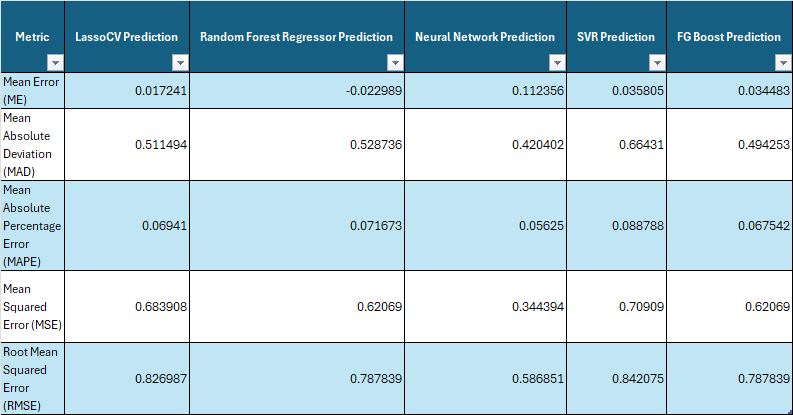

**Key Insights**:
- XGBoost (FG Boost Prediction) and Neural Network models demonstrated the best performance across all metrics.
- Random Forest and SVR models performed well but slightly lagged behind XGBoost and Neural Network.
- The Dummy model served as the baseline, with significantly higher error rates compared to advanced models.
- **The Neural Network model performed the best overall on the training data although on average overestimated movie rating much higher than the other models**

### **2. Top Recommended Movies**
The table below highlights the top recommended movies for each model based on user ratings and IMDb ratings.

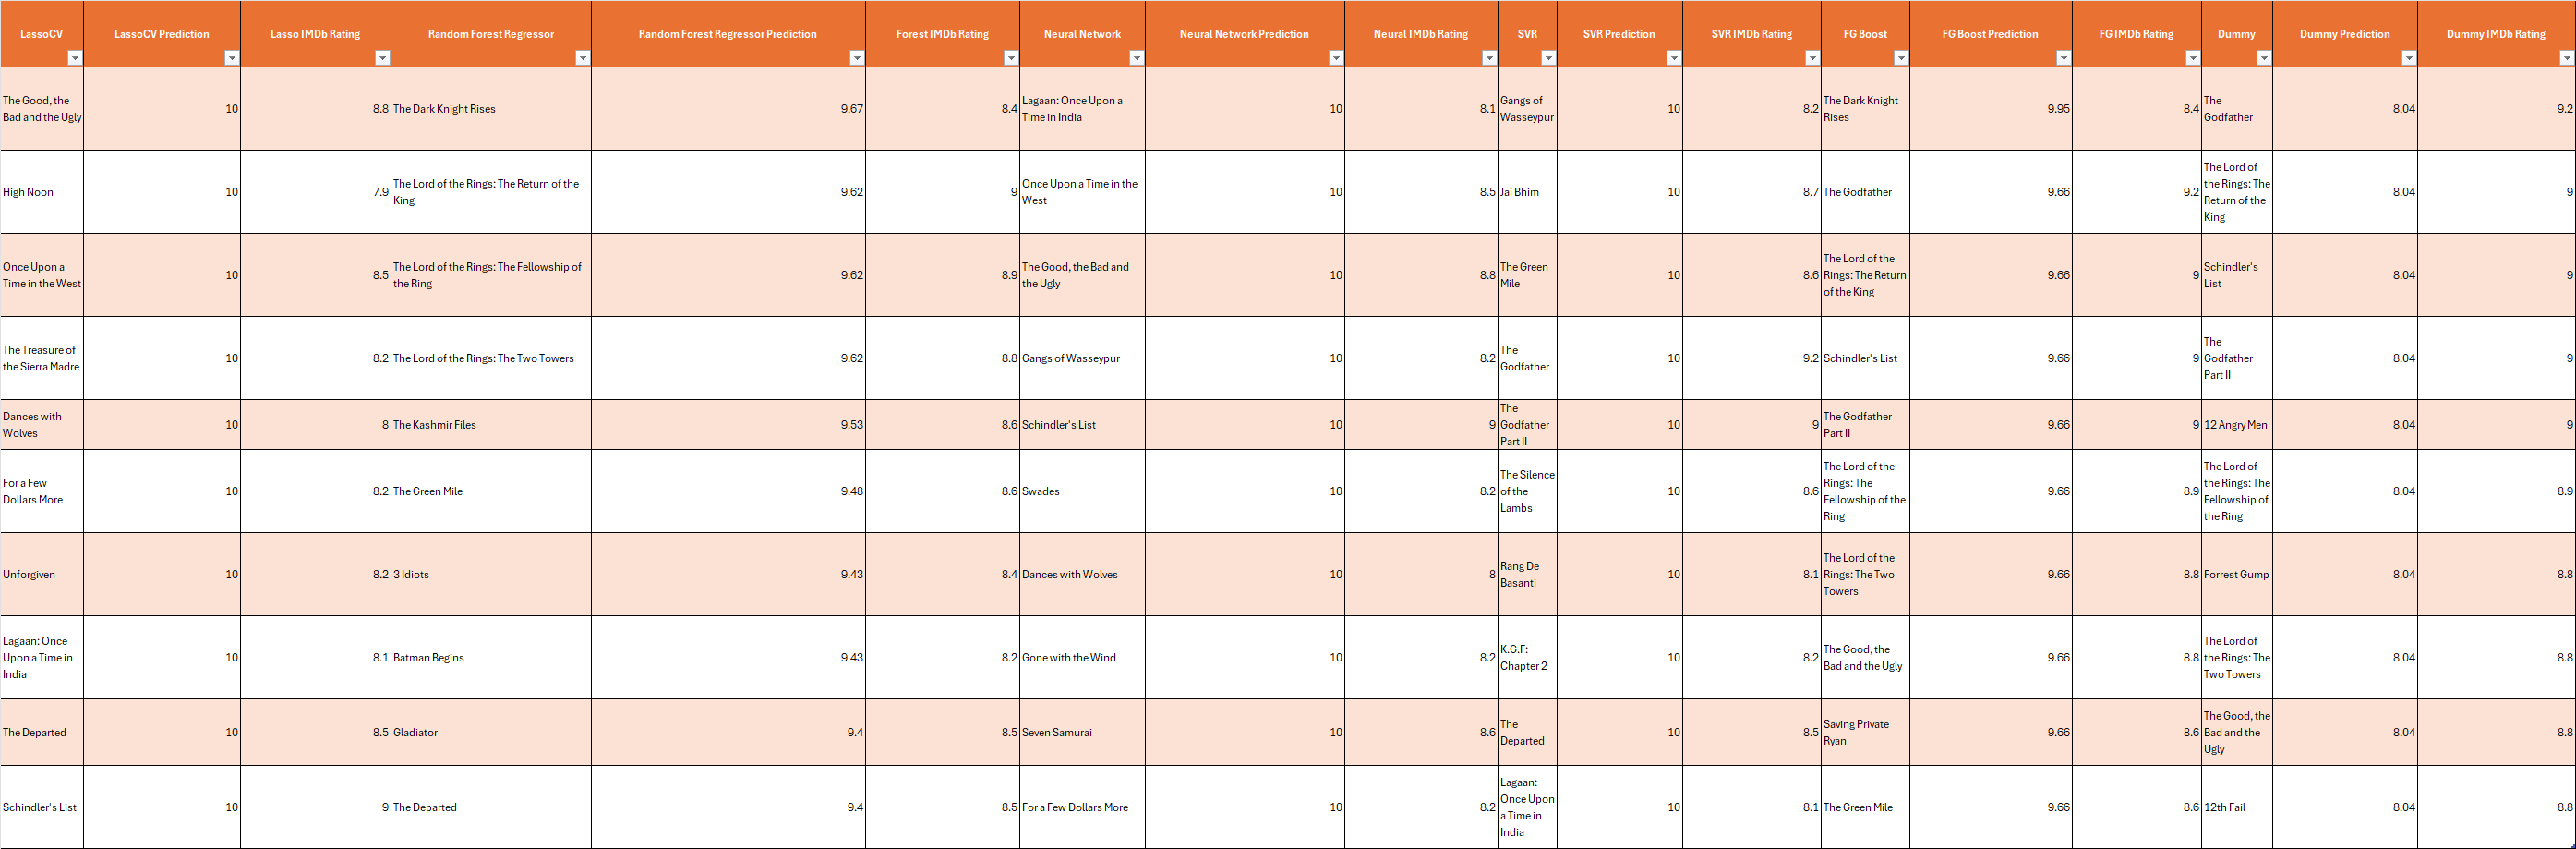

**Key Insights**:
- Each model provided pretty similar recommendations. Some common recommendations were The Dark Knight Rises, Once Upon a Time in the West, Lord of the Rings Movies, The Green Mile, etc.
- Something interesting I found was that some of my highest performing models were recommending me Indian Movies which is strange because I don't believe any of the movies I have rated were Indian. Maybe since the movie didn't have any famous actors/directors that were in my dummy columns it had nothing weighing it down so it's rating was almost solely based on IMDb Rating/Runtime. 
- Overall, a lot of these movies were movies that I have been planning to watch so I think my models ran quite well

## **Testing Models on Newly Rated Movies**

To evaluate the adaptability of the models, a set of previously unrated movies were reviewed, and their predicted ratings were compared to the user’s actual ratings. The movies used for this analysis are as follows:

### **Movies Rated**
- **Killers of the Flower Moon** | My Rating: 9
- **Ponyo** | My Rating: 8
- **The Grand Budapest Hotel** | My Rating: 9
- **The Hunger Games** | My Rating: 7
- **La La Land** | My Rating: 9
- **The Dark Knight Rises** | My Rating: 10
- **Home Alone** | My Rating: 7
- **Scooby-Doo** | My Rating: 6
- **Rise of the Planet of the Apes** | My Rating: 9

### **1. Model Predictions for Newly Rated Movies**
The table below compares predictions from all models to the user’s actual ratings for these movies.

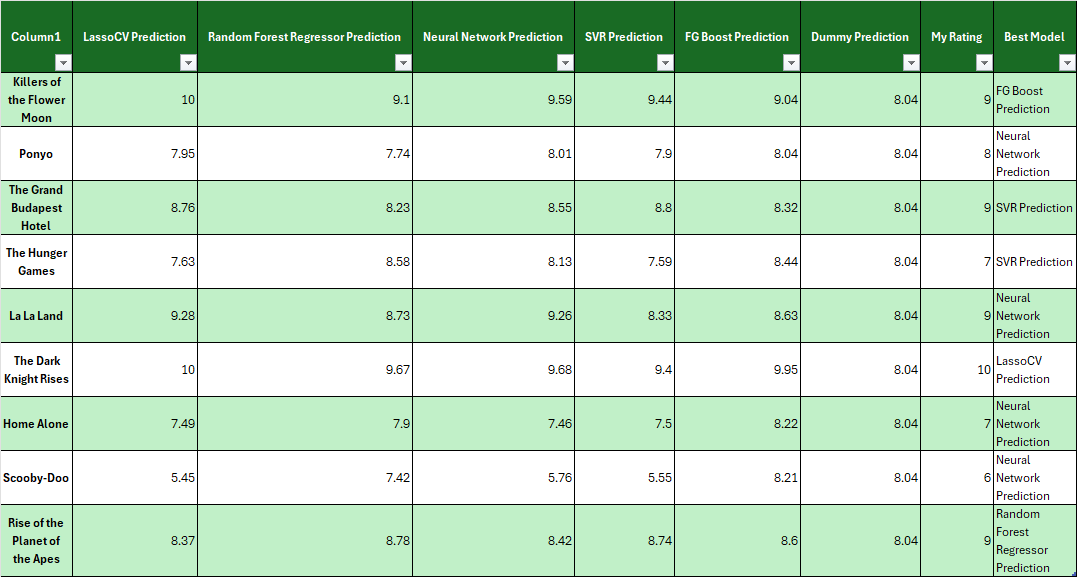

**Key Insights**:
- Neural Network and FG Boost consistently produced predictions closer to the user’s actual ratings.
- LassoCV and SVR occasionally showed strong predictions but had larger deviations for certain movies.
- The Dummy model, as expected, struggled to align with the user’s ratings due to its simplistic approach.

### **2. Best Model Distribution**
The pie chart below shows the distribution of models that performed the best for each movie based on prediction accuracy.

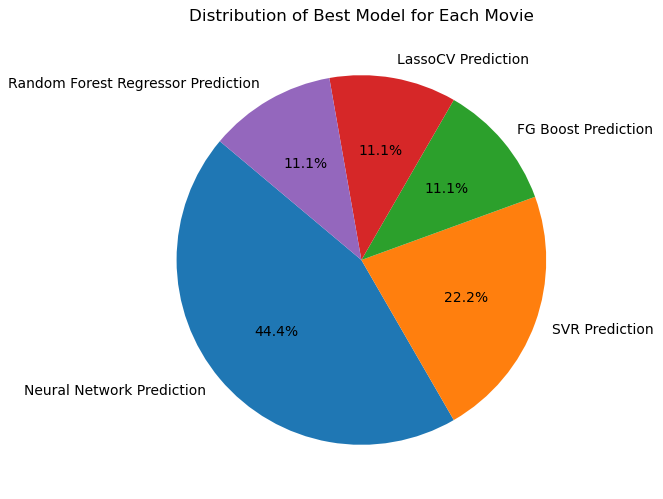

**Key Insights**:
- The Neural Network appeared to perform the best percentage wise being able to predict the closest between the models 44% of the time
- The second best model was the SVR model which was closest 22% of the time
- The dummy model was not closest any of the times

### **3. Performance Metrics for Newly Rated Movies**
The models were evaluated on performance metrics specific to these newly rated movies, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

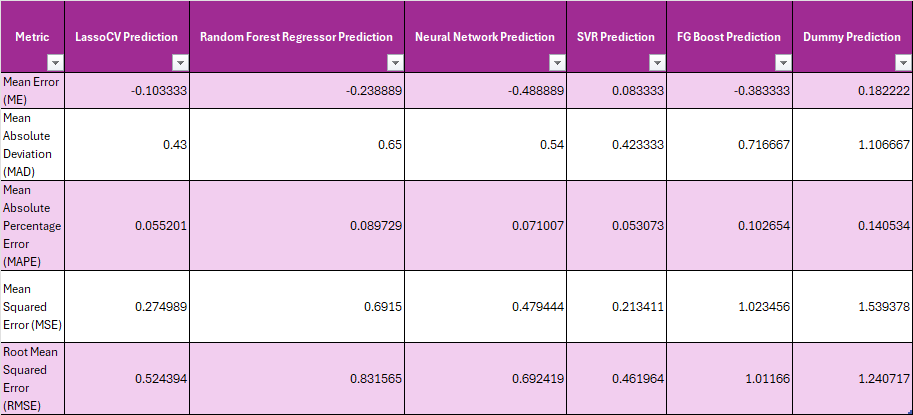

**Key Insights**:
- Here we can see that on average the LassoCV and SVR models were actually performing the best despite the neural network being closest 44% of the time
    - This means that while it was good in predicting some movies, it must've been far off for others
- The best model was SVR, then LassoCV, then Neural Network, then Random Forest Regressor, then XG Boost
- The dummy model was by far the worst again


### **Disclaimer**
Due to the inherent randomness in training processes (e.g., random initialization in Neural Networks, data splits during training, and model hyperparameter tuning), the results may vary slightly upon re-execution of the code. Future iterations of this analysis could include techniques like setting a random seed or cross-validation to ensure consistency.

## **Conclusion**

Coming back to this project was an incredibly enjoyable and rewarding experience. It was fascinating to revisit the recommendation system with a fresh perspective, refine its components, and explore new possibilities. Some of the most engaging aspects of this iteration included:

### **Reflections on the Project**
1. **Improved Data Frame Creation**:
   - Enhancing the creation of dummy variables was a particularly satisfying challenge. By identifying better features and refining how they were represented, the models gained a more nuanced understanding of the data.
   - Adding weighted and multiplicative variables provided an additional layer of complexity, allowing the models to capture relationships that might otherwise have been overlooked.

2. **Exploratory Data Analysis (EDA)**:
   - Conducting a deeper EDA was one of the most enjoyable parts of the process. Uncovering patterns and trends in the data, such as genre-specific biases or the influence of certain directors and actors, brought new insights that directly informed the feature engineering.

3. **Experimenting with New Models**:
   - Exploring models like Neural Networks, SVR, and XGBoost that I hadn’t worked with previously was an exciting challenge. Each model brought its own strengths and limitations, and it was rewarding to see how they performed against one another in various scenarios.

### **Future Vision**
Looking ahead, one goal I am particularly excited about is the idea of turning this project into an interactive website. The vision is to allow users to input their preferences—such as choosing specific genres, directors, or actors they want (or don’t want) to be recommended—and have the system dynamically generate personalized recommendations. This would make the tool not only more practical but also more engaging for users who are passionate about movies.

Additionally, integrating user feedback into the system could further refine its recommendations over time, making it a continuously learning and improving platform.

## **Works Cited**

1. **IMDb**  
   Data for this project was sourced from publicly available IMDb datasets.  
   Website: [IMDb](https://www.imdb.com)

2. **GitHub Copilot and OpenAI**  
   Portions of the code and ideas for refining the recommendation system were assisted by GitHub Copilot and OpenAI tools, which provided programming suggestions and insights throughout the development process.  
   Website: [OpenAI](https://openai.com)